In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
bank=pd.read_csv('bank/bank.csv',sep=';',header=0)

In [71]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [55]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [56]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [57]:
bank.describe()


,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [58]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

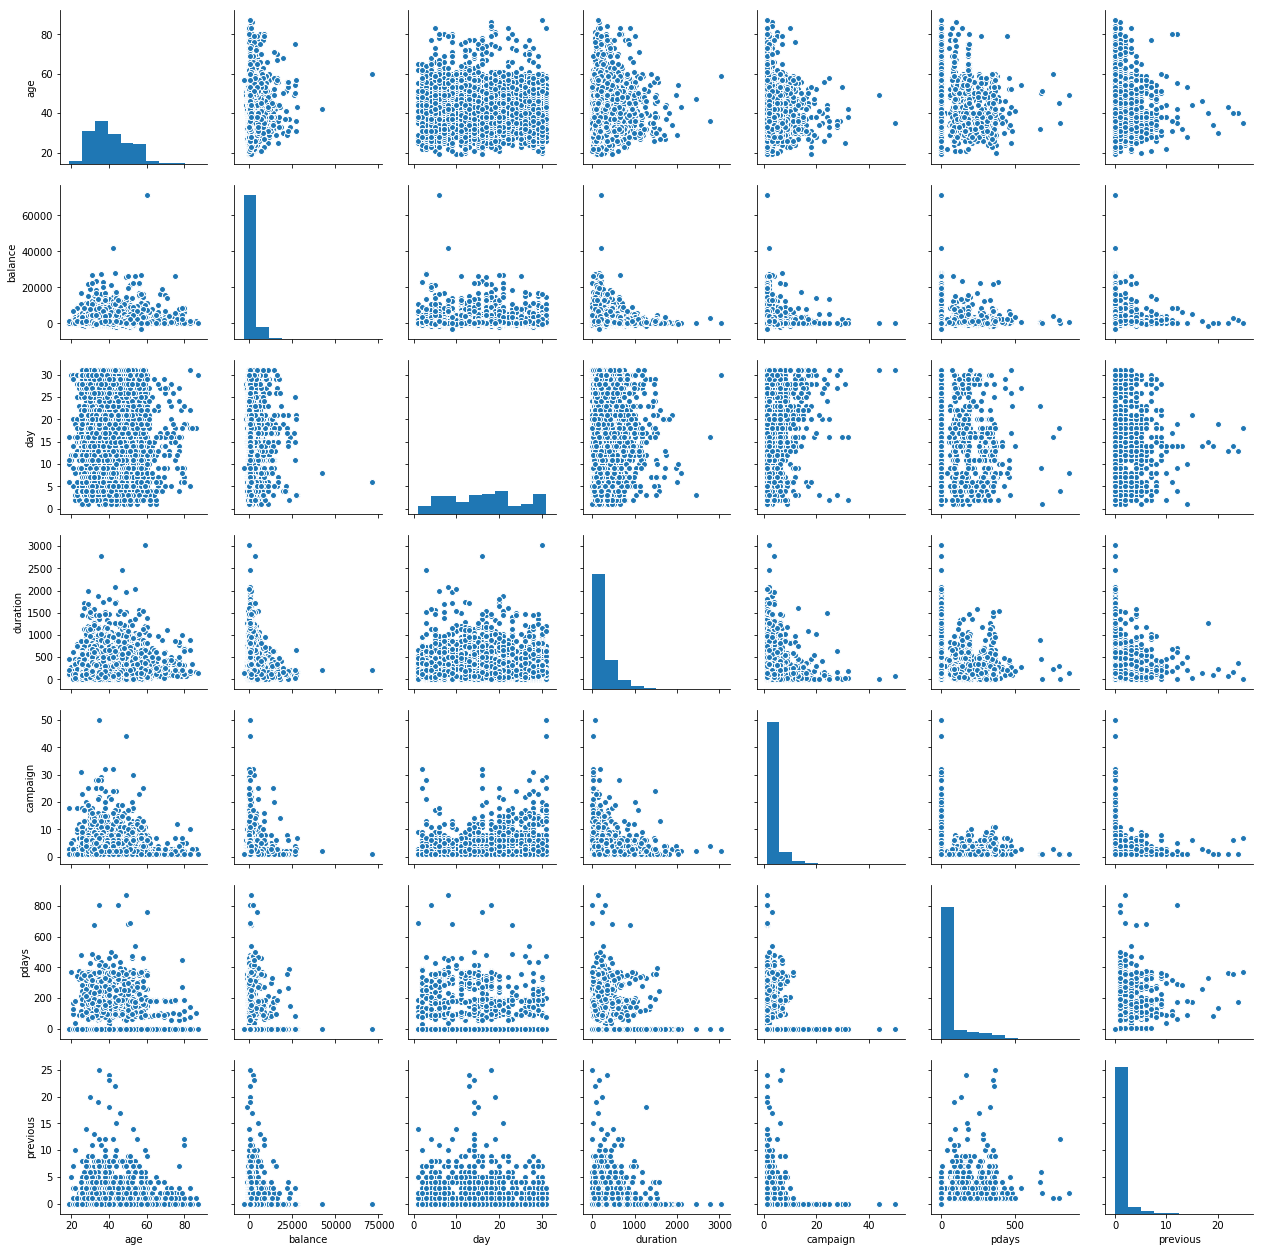

In [73]:
sns.pairplot(bank,palette='bwr')

In [74]:
def differentiateFeature(dataFrame):
   numerical_feature_columns = list(dataFrame._get_numeric_data().columns)
   categorical_feature_columns = list(set(dataFrame.columns) - set(dataFrame._get_numeric_data().columns))
   return numerical_feature_columns ,categorical_feature_columns

n_bank,c_bank=differentiateFeature(bank)
print(n_bank)
print(c_bank)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'contact', 'education', 'housing', 'default', 'y', 'month', 'loan', 'poutcome']


In [75]:
def findUniueValues(df,columnList) :
   for i, col in enumerate(columnList):
       print(col,"::",df[col].unique())
       print()
findUniueValues(bank,bank.columns)

age :: [30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]

job :: ['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']

marital :: ['married' 'single' 'divorced']

education :: ['primary' 'secondary' 'tertiary' 'unknown']

default :: ['no' 'yes']

balance :: [ 1787  4789  1350 ...  -333 -3313  1137]

housing :: ['no' 'yes']

loan :: ['no' 'yes']

contact :: ['cellular' 'unknown' 'telephone']

day :: [19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]

month :: ['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']

duration :: [  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74 

In [78]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


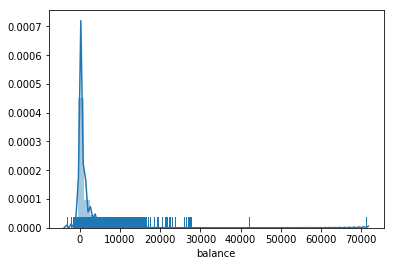

In [84]:
sns.distplot(bank['balance'],rug=True)

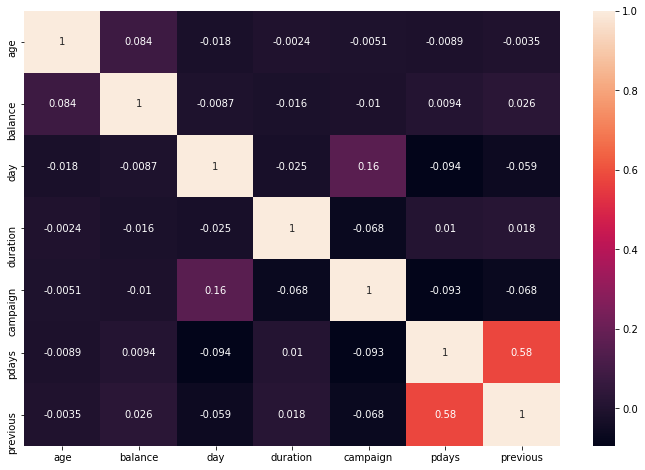

In [89]:
plt.figure(figsize=(12,8))
corr=bank.corr()
sns.heatmap(corr,annot=True)

In [91]:
bank1=pd.read_csv('bank-additional/bank-additional/bank-additional.csv',sep=';',header=0)

In [93]:
bank1.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [95]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
age               4119 non-null int64
job               4119 non-null object
marital           4119 non-null object
education         4119 non-null object
default           4119 non-null object
housing           4119 non-null object
loan              4119 non-null object
contact           4119 non-null object
month             4119 non-null object
day_of_week       4119 non-null object
duration          4119 non-null int64
campaign          4119 non-null int64
pdays             4119 non-null int64
previous          4119 non-null int64
poutcome          4119 non-null object
emp.var.rate      4119 non-null float64
cons.price.idx    4119 non-null float64
cons.conf.idx     4119 non-null float64
euribor3m         4119 non-null float64
nr.employed       4119 non-null float64
y                 4119 non-null object
dtypes: float64(5), int64(5), object(11)
memory usage: 675.9+ KB


In [112]:
#sns.pairplot(bank1)

In [100]:
n_b1,c_b1=differentiateFeature(bank1)

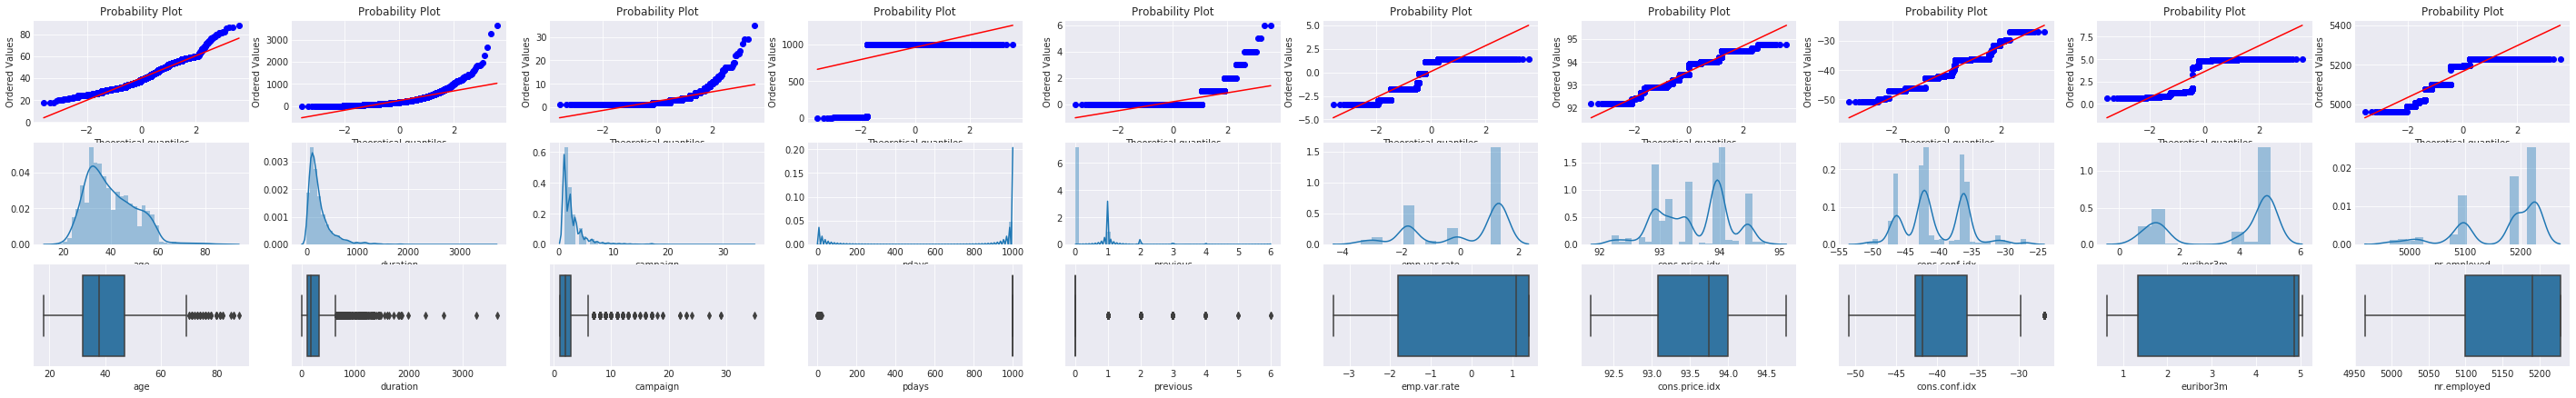

In [113]:
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer
import statsmodels.api as sm
from scipy import stats
def printAllHistogram(dataFrame,columns):
   l = len(columns)
   plt.figure()
   f, axes = plt.subplots( 3,l, figsize=(50, 7), sharex=False)
   for i, col in enumerate(columns):
       sns.distplot(dataFrame[col],ax=axes[1,i])
       ax = axes[0,i]
       res = stats.probplot(dataFrame[col],plot=ax )
       sns.set_style("darkgrid")
       sns.boxplot(x=dataFrame[col],ax=axes[2,i])
       
    
printAllHistogram(bank1,n_b1)
plt.savefig('bank1_numeric.png')

In [155]:
from sklearn import preprocessing
def label_encoding_(l1):
    label=preprocessing.LabelEncoder()
    label.fit(l1)
    return pd.DataFrame(label.transform(l1))

In [159]:
bank1['y']=(label_encoding_(bank1['y']))

/home/siddesh/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


AttributeError: module 'matplotlib.pyplot' has no attribute 'saveplot'

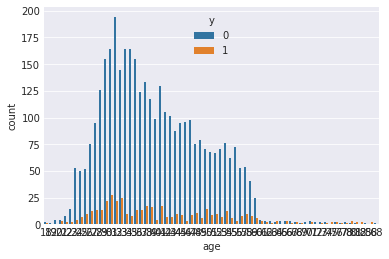

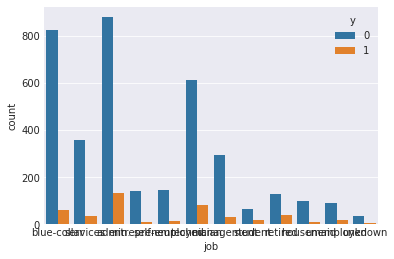

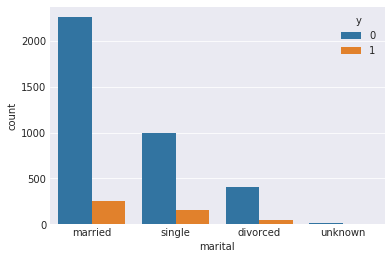

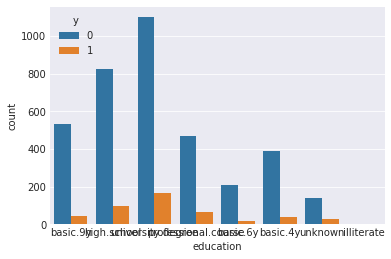

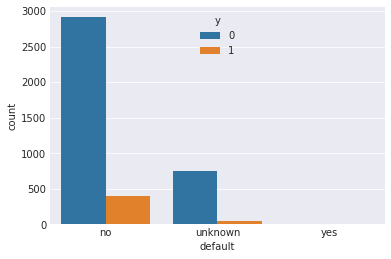

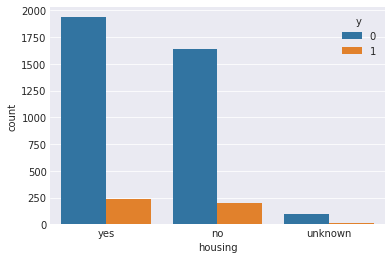

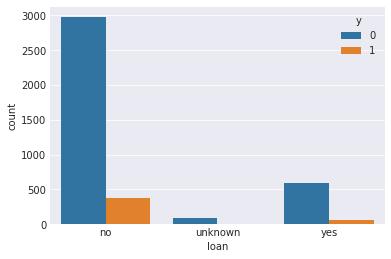

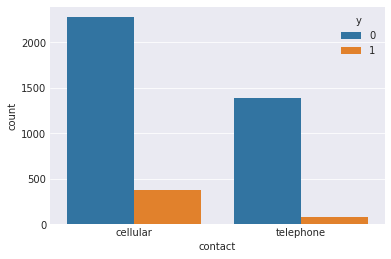

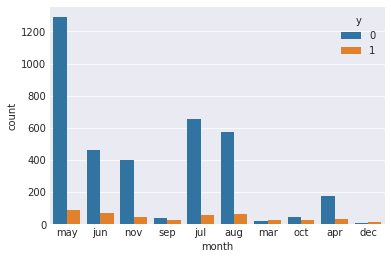

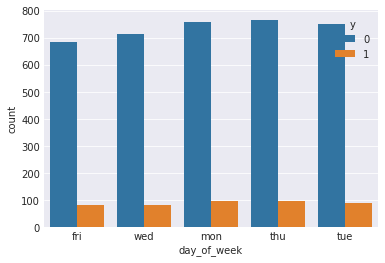

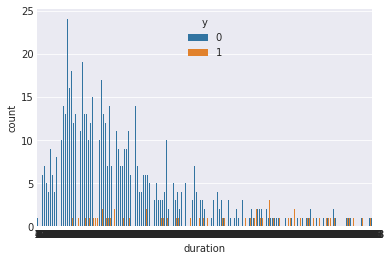

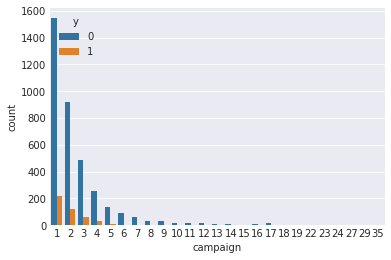

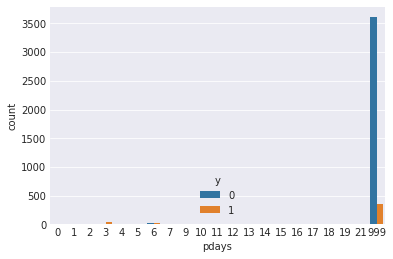

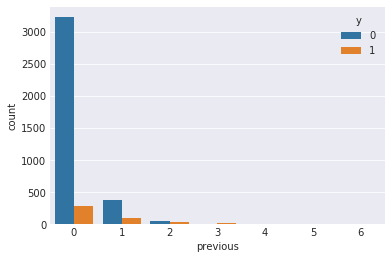

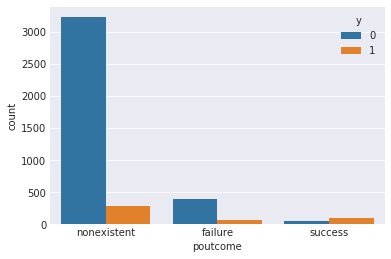

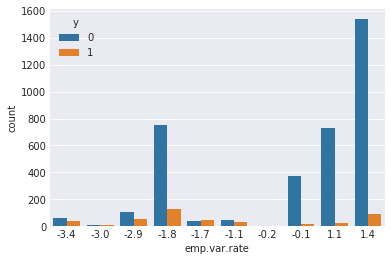

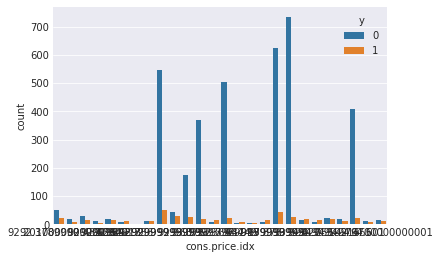

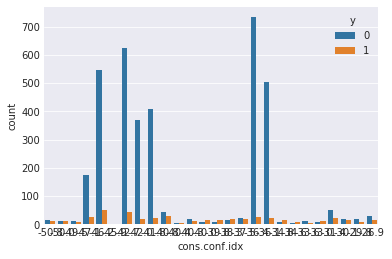

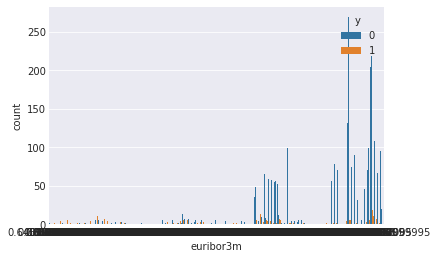

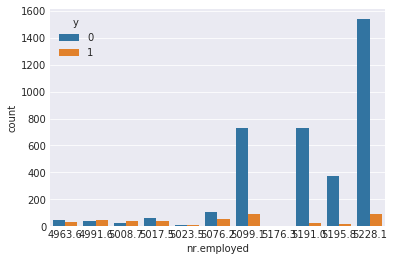

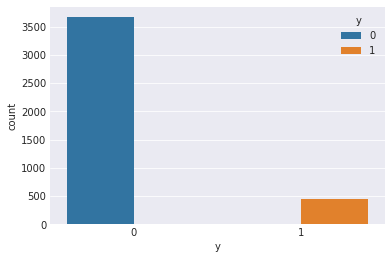

In [160]:
def catagoricalUnivariant(dataFrame,columnsList):
   l = len(columnsList)
   #f, axes = plt.subplots( 1,l, figsize=(50, 7), sharex=False)
   for i, col in enumerate(columnsList):
       plt.figure(i)
       sns.countplot(col, data=dataFrame,hue="y")
#catagoricalUnivariant(bank1,c_b1)
catagoricalUnivariant(bank1,bank1.columns)
plt.saveplot('countplot_bank1')

In [161]:
bank1.to_csv('bank1.csv')